In [1]:
import os

In [2]:
data_dir = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel'

In [3]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'binaryModel3.h5',
 'binaryModel3_2.h5',
 'binaryModel3_3.h5',
 'binaryModel3_4.h5',
 'binaryModel3_5.h5',
 'binaryModel3_6.h5',
 'binModelUpgradat.h5',
 'IncercareDeModel.ipynb',
 'infectate',
 'modelBinar2.h5',
 'modelCheckpoints',
 'neinfectate',
 'Resize.ipynb',
 'testingPics',
 'testingPics_lite',
 'trainingPics',
 'trainingPics_lite']

In [4]:
import tensorflow as tf

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
train_path = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/trainingPics_lite'
test_path = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/testingPics_lite'

In [8]:
print('folders from train folder')
print(os.listdir(train_path))
print('\n folders from test folder')
os.listdir(test_path)

folders from train folder
['infectate', 'neinfectate']

 folders from test folder


['infectate', 'neinfectate']

In [9]:
os.listdir(train_path+'/infectate')

['00000001_000.png',
 '00000001_001.png',
 '00000001_002.png',
 '00000004_000.png',
 '00000005_006.png',
 '00000005_007.png',
 '00000008_000.png',
 '00000008_002.png',
 '00000009_000.png',
 '00000010_000.png',
 '00000011_000.png',
 '00000011_005.png',
 '00000011_006.png',
 '00000011_007.png',
 '00000012_000.png',
 '00000017_000.png',
 '00000019_000.png',
 '00000020_000.png',
 '00000020_001.png',
 '00000020_002.png',
 '00000021_000.png',
 '00000021_001.png',
 '00000022_001.png',
 '00000023_002.png',
 '00000023_004.png',
 '00000024_000.png',
 '00000025_000.png',
 '00000026_000.png',
 '00000027_000.png',
 '00000028_000.png',
 '00000030_000.png',
 '00000030_001.png',
 '00000033_000.png',
 '00000034_000.png',
 '00000036_000.png',
 '00000038_000.png',
 '00000038_001.png',
 '00000038_003.png',
 '00000038_006.png',
 '00000039_004.png',
 '00000040_001.png',
 '00000040_003.png',
 '00000042_006.png',
 '00000043_000.png',
 '00000044_000.png',
 '00000044_001.png',
 '00000044_002.png',
 '00000045_00

In [10]:
sick_lung = train_path + '/infectate/' + '00000001_000.png'

In [11]:
sick_lung

'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/trainingPics_lite/infectate/00000001_000.png'

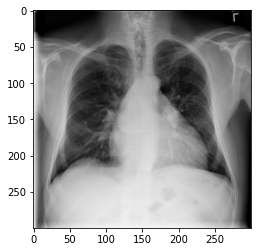

In [12]:
plt.imshow(imread(sick_lung),cmap='gray')

dimension1 = []
dimension2 = []

train_path_infected = train_path + '/infectate'

for image_filename in os.listdir(train_path_infected):
    image = imread(train_path_infected + '/' + image_filename)
    d1 = image.shape[0]
    d2 = image.shape[1]
    dimension1.append(d1)
    dimension2.append(d2)


np.mean(dimension1)

np.mean(dimension2)

In [8]:
#all that for is done in order to get the dimension for each photo
#in order to get a mean image dimension in order to reshape the photos
#if necessary
# 1024 was used because the dimension are constant 
# in case they are not constant and the graphical represeantation is not a single point 
# the image shape should be ajusted with
# image_shape = (round_down(np.mean(dimension1)),round_down(np.mean(dimension2)))
image_shape = (300,300,1)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *

In [15]:
imread(sick_lung).max()

1.0

In [10]:
image_generator = ImageDataGenerator(rotation_range=25,
                                    width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [17]:
image_generator

In [18]:
sick_lung = imread(sick_lung)

In [19]:
sick_lung

array([[0.7647059 , 0.74509805, 0.7254902 , ..., 0.01960784, 0.01960784,
        0.01176471],
       [0.7372549 , 0.7176471 , 0.6784314 , ..., 0.01960784, 0.01960784,
        0.01176471],
       [0.7137255 , 0.6666667 , 0.53333336, ..., 0.01960784, 0.01960784,
        0.01176471],
       ...,
       [0.99607843, 0.95686275, 0.8392157 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.9607843 , 0.84705883, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.9647059 , 0.84313726, ..., 0.00784314, 0.        ,
        0.        ]], dtype=float32)

In [118]:
image_generator.flow_from_directory(train_path)

Found 10000 images belonging to 2 classes.


In [119]:
image_generator.flow_from_directory(test_path)

Found 4284 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [180]:
modelPreantrenat = ResNet50(include_top = False)

In [23]:
binModel = Sequential()

binModel.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModel.add(MaxPool2D(pool_size=(2,2)))

binModel.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModel.add(MaxPool2D(pool_size=(2,2)))

binModel.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModel.add(MaxPool2D(pool_size=(2,2)))

binModel.add(Flatten())

binModel.add(Dense(128,activation='relu'))
binModel.add(Dropout(0.5))

binModel.add(Dense(15,activation='softmax'))

binModel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
binModel

In [25]:
binModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [14]:
batch_size = 16

In [15]:
train_images_model = image_generator.flow_from_directory(train_path,target_size=image_shape[:2],
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                        shuffle=True)

Found 20000 images belonging to 2 classes.


In [16]:
test_images_model = image_generator.flow_from_directory(test_path,target_size=image_shape[:2],
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 8500 images belonging to 2 classes.


In [17]:
train_images_modelRGB = image_generator.flow_from_directory(train_path,target_size=image_shape[:2],
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                        shuffle=True)

Found 20000 images belonging to 2 classes.


In [18]:
test_images_modelRGB = image_generator.flow_from_directory(test_path,target_size=image_shape[:2],
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 8500 images belonging to 2 classes.


In [154]:
train_images_model.class_indices

{'infectate': 0, 'neinfectate': 1}

In [155]:
test_images_model.class_indices

{'infectate': 0, 'neinfectate': 1}

In [156]:
total_number_of_pictures = test_images_model.n + train_images_model.n
total_number_of_pictures

28500

In [19]:
checkpoint_path = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints/VG16ModelCombinat.h5'
checkpoint_folder = os.path.dirname(checkpoint_path)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [21]:
checkpoint_call = ModelCheckpoint(checkpoint_path,
                                  save_weighs_only=True,
                                  verbose=1)

In [27]:
import math

trainedModel = binModel.fit_generator(train_images_model,
                                     steps_per_epoch=int(math.ceil(train_images_model.n/batch_size)),
                                     epochs=10,
                                     validation_data= test_images_model,
                                      validation_steps = int(math.ceil(test_images_model.n/batch_size))
                                     callbacks = [early_stop,checkpoint_call],
                                     verbose=1)

In [160]:
trainedModel = binModel.fit(train_images_model,
                                     steps_per_epoch=int(math.ceil(train_images_model.n/batch_size)),
                                     epochs=10,
                                     validation_data= test_images_model,
                                     callbacks = [early_stop,checkpoint_call],
                                     verbose=1)

Epoch 1/10
1250/1250 [==============================] - 1547s 1s/step - loss: 0.6935 - accuracy: 0.5081 - val_loss: 0.6910 - val_accuracy: 0.5354

Epoch 00001: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\modelBinar3_6.h5
Epoch 2/10
1250/1250 [==============================] - 1396s 1s/step - loss: 0.6927 - accuracy: 0.5124 - val_loss: 0.6906 - val_accuracy: 0.5434

Epoch 00002: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\modelBinar3_6.h5
Epoch 3/10
1250/1250 [==============================] - 1541s 1s/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6910 - val_accuracy: 0.5353

Epoch 00003: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\modelBinar3_6.h5
Epoch 4/10
1250/1250 [==============================] - 1500s 1s/step - loss: 0.6933 - accuracy: 0.5073 - val_loss: 0.6920 - val_accuracy: 0.5268

Epoch 00004: saving model to E:/Faculta/_LICENTA/_Aplic

In [161]:
binModel.save('binaryModel3_6.h5')

In [164]:
binModel.history.history

{'loss': [0.6935012340545654,
  0.6927073001861572,
  0.6930740475654602,
  0.6933279037475586],
 'accuracy': [0.5080500245094299,
  0.5124499797821045,
  0.5090500116348267,
  0.5072500109672546],
 'val_loss': [0.6909610629081726,
  0.6906433701515198,
  0.6910237073898315,
  0.6920189261436462],
 'val_accuracy': [0.5354117751121521,
  0.5434117913246155,
  0.5352941155433655,
  0.5268235206604004]}

<AxesSubplot:>

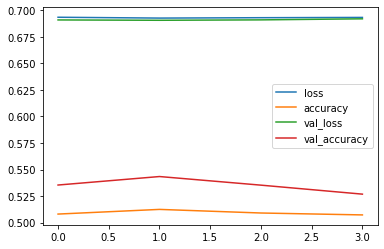

In [166]:
losses = pd.DataFrame(binModel.history.history)
losses.plot()

In [34]:
test_path_full = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/testingPics'
test_images_generator = image_generator.flow_from_directory(test_path_full,target_size=image_shape[:2],
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 25596 images belonging to 2 classes.


In [128]:
binModel.evaluate(test_images_generator)

1600/1600 [==============================] - 484s 302ms/step - loss: 0.6945 - accuracy: 0.4930


[0.694492518901825, 0.49300670623779297]

In [167]:
pret = binModel.predict(test_images_generator)

In [168]:
pret

array([[0.4954936 ],
       [0.50543797],
       [0.50543797],
       ...,
       [0.50543797],
       [0.50543797],
       [0.50543797]], dtype=float32)

In [169]:
predictions = pret > 0.5

In [170]:
predictions

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

model 4 cel mai bun pana acum

In [171]:
len(predictions)

25596

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [172]:
test_images_model.classes

array([0, 0, 0, ..., 1, 1, 1])

In [173]:
test_images_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [174]:
print(classification_report(test_images_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.66      0.15      0.24     15735
           1       0.39      0.88      0.54      9861

    accuracy                           0.43     25596
   macro avg       0.53      0.51      0.39     25596
weighted avg       0.56      0.43      0.36     25596



In [23]:
image_shape_vgg16 = (300,300,3)
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=image_shape_vgg16)
VGG16_model.trainable = False

In [184]:
combinedModel = Sequential()

combinedModel.add(image_shape_vgg16)

combinedModel.add(Flatten())

combinedModel.add(Dense(128,activation='relu'))
combinedModel.add(Dropout(0.5))

combinedModel.add(Dense(1,activation='sigmoid'))

combinedModel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

TypeError: The added layer must be an instance of class Layer. Found: (300, 300, 3)

In [186]:
binModelUpdated = Sequential()

binModelUpdated.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModelUpdated.add(MaxPool2D(pool_size=(2,2)))

binModelUpdated.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModelUpdated.add(MaxPool2D(pool_size=(2,2)))

binModelUpdated.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModelUpdated.add(MaxPool2D(pool_size=(2,2)))

binModelUpdated.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModelUpdated.add(MaxPool2D(pool_size=(2,2)))

binModelUpdated.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModelUpdated.add(MaxPool2D(pool_size=(2,2)))

binModelUpdated.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
binModelUpdated.add(MaxPool2D(pool_size=(2,2)))

binModelUpdated.add(Flatten())

binModelUpdated.add(Dense(128,activation='relu'))
binModelUpdated.add(Dropout(0.5))

binModelUpdated.add(Dense(128,activation='relu'))
binModelUpdated.add(Dropout(0.5))

binModelUpdated.add(Dense(1,activation='sigmoid'))

binModelUpdated.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [187]:
binModelUpdated.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 64)       

In [189]:
trainedModelUpgradat = binModelUpdated.fit(train_images_model,
                                     steps_per_epoch=int(math.ceil(train_images_model.n/batch_size)),
                                     epochs=10,
                                     validation_data= test_images_model,
                                     callbacks = [early_stop,checkpoint_call],
                                     verbose=1)

Epoch 1/10
1250/1250 [==============================] - 1597s 1s/step - loss: 0.7434 - accuracy: 0.5001 - val_loss: 0.6933 - val_accuracy: 0.5005

Epoch 00001: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\modelBinar3_6.h5
Epoch 2/10
1250/1250 [==============================] - 1387s 1s/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00002: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\modelBinar3_6.h5
Epoch 3/10
1250/1250 [==============================] - 1489s 1s/step - loss: 0.6936 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00003: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\modelBinar3_6.h5
Epoch 4/10
1250/1250 [==============================] - 1395s 1s/step - loss: 0.6935 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.5000

Epoch 00004: saving model to E:/Faculta/_LICENTA/_Aplic

In [190]:
pret = binModelUpdated.predict(test_images_generator)

In [192]:
predictions = pret > 0.5
predictions

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [193]:
print(classification_report(test_images_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15735
           1       0.39      1.00      0.56      9861

    accuracy                           0.39     25596
   macro avg       0.19      0.50      0.28     25596
weighted avg       0.15      0.39      0.21     25596



C:\Users\Willestur\anaconda3\envs\licentaVersion2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Willestur\anaconda3\envs\licentaVersion2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Willestur\anaconda3\envs\licentaVersion2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [194]:
binModelUpdated.save('binModelUpgradat.h5')

In [24]:
pretrained_model = MobileNetV2(input_shape=[*[300,300],3], include_top=False)
pretrained_model.trainable = False

modelCuVGG16Version2 = Sequential([
    VGG16_model,
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

modelCuVGG16Version2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
modelCuVGG16Version2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 20,023,361
Trainable params: 5,308,673
Non-trainable params: 14,714,688
_________________________________________________________________


In [28]:
modelCuVGG16Version2.fit(train_images_modelRGB,
                                     steps_per_epoch=int(math.ceil(train_images_modelRGB.n/batch_size)),
                                     epochs=10,
                                     validation_data= test_images_modelRGB,
                                     callbacks = [early_stop,checkpoint_call],
                                     verbose=1)

Epoch 1/10
1250/1250 [==============================] - 8770s 7s/step - loss: 2.0050 - accuracy: 0.5149 - val_loss: 0.6870 - val_accuracy: 0.5625

Epoch 00001: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\VG16ModelCombinat.h5
Epoch 2/10
1250/1250 [==============================] - 7389s 6s/step - loss: 0.6870 - accuracy: 0.5489 - val_loss: 0.6933 - val_accuracy: 0.5002

Epoch 00002: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\VG16ModelCombinat.h5
Epoch 3/10
1250/1250 [==============================] - 6598s 5s/step - loss: 0.6949 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5002

Epoch 00003: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/modelCheckpoints\VG16ModelCombinat.h5


In [29]:
modelCuVGG16Version2.save('VGG16Version2.h5')

In [35]:
pret = modelCuVGG16Version2.predict(test_images_generator)

In [36]:
predictions = pret > 0.5
predictions

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [39]:
print(classification_report(test_images_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.70      0.00      0.00     15735
           1       0.39      1.00      0.56      9861

    accuracy                           0.39     25596
   macro avg       0.54      0.50      0.28     25596
weighted avg       0.58      0.39      0.21     25596

